# Método da Secante

O método da secante é uma técnica numérica para encontrar raízes de funções. Diferente do método da bisseção, ele não requer que o intervalo inicial contenha uma raiz. Ele utiliza uma aproximação baseada em uma reta secante para iterativamente encontrar a raiz.

In [1]:
import sys
import os

# Obtém o caminho absoluto do diretório do notebook
notebook_dir = os.path.abspath('')

# Adiciona o diretório pai ao sys.path para reconhecer "Graph"
sys.path.append(os.path.join(notebook_dir, '..'))

import numpy as np
import sympy as sp
from tabulate import tabulate
from Graph.graph import plotar_funcao

In [6]:
def secante(f, x0, x1, tol=0.001):
    """
    Implementa o método da secante para encontrar a raiz de uma função.

    Parâmetros:
    f  -- Função contínua
    x0 -- Primeira aproximação inicial
    x1 -- Segunda aproximação inicial
    tol -- Tolerância para o erro (padrão: 1e-6)
    max_iter -- Número máximo de iterações

    Retorna:
    raiz aproximada e tabela com as iterações
    """
    tabela = []
    iter = 0
    erro_absoluto = None
    erro_relativo = None

    while True:
        if abs(f(x1) - f(x0)) < 1e-12:  # Evita divisão por zero
            raise ValueError(f"Erro: Divisão por zero detectada no método da secante na iteração: {iter}.")
        
        x2 = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        erro_absoluto = abs(x2 - x1)
        erro_relativo = abs((x2 - x1) / x2) if x2 != 0 else None

        tabela.append([iter, x0, x1, x2, f(x2), erro_absoluto, erro_relativo])
        iter += 1

        if erro_absoluto < tol:
            return x2, tabela

        x0, x1 = x1, x2  # Atualiza valores

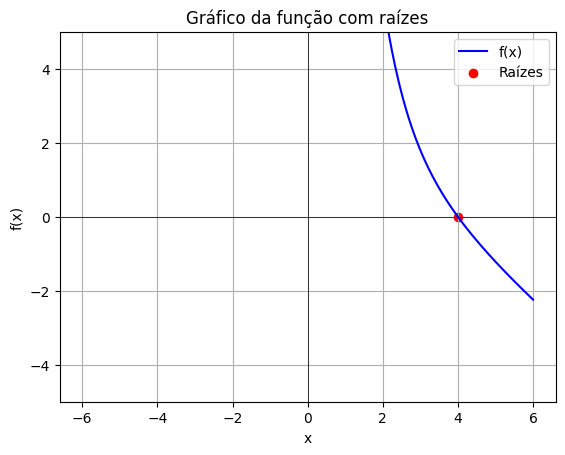

  Iteração      x0      x1      x2    f(x2)    Erro Absoluto    Erro Relativo
----------  ------  ------  ------  -------  ---------------  ---------------
         0  1.0000  5.0000  4.7744  -0.9615           0.2256           0.0473
         1  5.0000  4.7744  3.9111   0.1279           0.8633           0.2207
         2  4.7744  3.9111  4.0125  -0.0150           0.1013           0.0253
         3  3.9111  4.0125  4.0018  -0.0003           0.0106           0.0027
         4  4.0125  4.0018  4.0016   0.0000           0.0002           0.0000
Raiz aproximada: 4.0016


In [7]:
# Definição da função pelo usuário
x = sp.Symbol('x')
expressao = input("Digite a função em termos de x (ex: sin(x) + exp(x)): ")
funcao = sp.lambdify(x, sp.sympify(expressao), 'numpy')

# Solicita os valores iniciais
x0 = float(input("Digite a primeira aproximação inicial: "))
x1 = float(input("Digite a segunda aproximação inicial: "))
tol = float(input("Digite o erro tolerado: "))

plotar_funcao(funcao)

# Aplicando o método da secante
raiz, tabela = secante(funcao, x0, x1)

# Exibindo resultados
print(tabulate(tabela, headers=["Iteração", "x0", "x1", "x2", "f(x2)", "Erro Absoluto", "Erro Relativo"], floatfmt=".4f"))
print(f"Raiz aproximada: {raiz:.4f}")